# Part1 practice in class

In [1]:
import numpy as np
import scipy.io
import scipy.cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
presorted = {k: v for k, v in scipy.io.loadmat('spike_waveforms').items()\
            if k in('sig118a_wf', 'sig118b_wf', 'sig118c_wf')}
presorted = [presorted['sig118a_wf'],presorted['sig118b_wf'],presorted['sig118c_wf']]

In [3]:
def make_training_set(data):
    n = data.shape[0]
    idx_training = np.random.choice(n,n//6,replace = False)
    training_set = data[idx_training]
    test_set = [data[i] for i in range(n) if n not in idx_training]
    return training_set, test_set

In [4]:
two_neurons_training, two_neurons_test = make_training_set(np.concatenate(presorted[1:]))
three_neurons_training, three_neurons_test = make_training_set(np.concatenate(presorted))

In [5]:
np.array(presorted[1]).shape

(11558, 32)

In [6]:
two_neurons_test[1]

array([ 172,  238,  403,  556,  506,  143, -406, -844, -924, -674, -356,
       -168,  -76,   20,  147,  265,  373,  490,  587,  602,  538,  474,
        452,  430,  350,  248,  198,  188,  135,   39,  -26,  -49], dtype=int16)

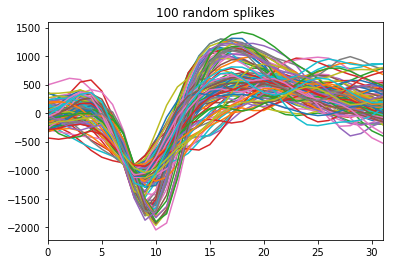

In [7]:
for waveforms in three_neurons_training[:100]:
    plt.plot(waveforms)
plt.xlim((0,31))
plt.title('100 random splikes')
plt.show()

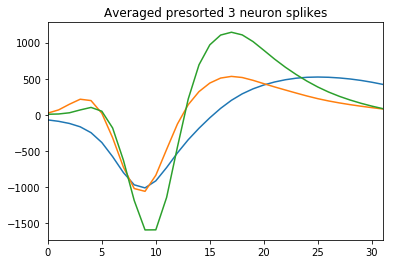

In [8]:
plt.figure()
for waveforms in presorted:
    plt.plot(np.mean(waveforms, axis = 0))
plt.xlim((0,31))
plt.title('Averaged presorted 3 neuron splikes')
plt.show()

In [9]:
def PCA_train(training_set, n_components):
    mean = np.mean(training_set, axis = 0)
    data = training_set-mean
    U,S,VT = np.linalg.svd(data)
    
    basis_components = VT[:n_components,:]
    
    return basis_components, mean

In [10]:
def PCA_classify(data, new_basis, mean):
    return(np.array(data) - mean)@ new_basis.T

In [11]:
two_new_basis, two_mean = PCA_train(two_neurons_training,2)

In [12]:
two_new_basis.shape

(2, 32)

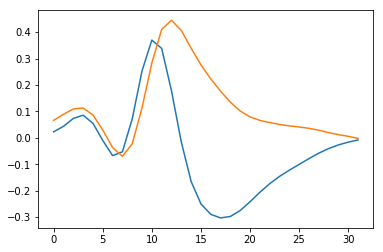

In [13]:
for comp in two_new_basis:
    plt.plot(comp)
plt.show()

In [14]:
two_classified = PCA_classify(two_neurons_test, two_new_basis, two_mean)

In [15]:
(two_new_basis.T).shape

(32, 2)

In [16]:
two_classified.shape

(19357, 2)

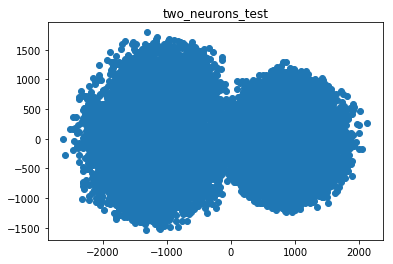

In [17]:
plt.figure()
plt.scatter(*two_classified.T)
plt.title('two_neurons_test')
plt.show()

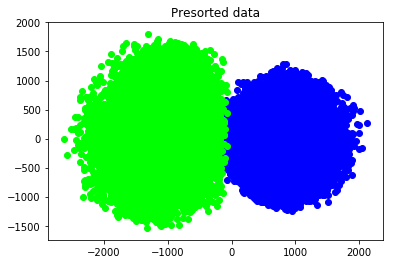

In [18]:
plt.figure()
presorted_two_classified = [PCA_classify(spikes, two_new_basis, two_mean) for spikes in presorted[1:]]
colors = ['#0000ff','#00ff00']
for dat, color in zip(presorted_two_classified, colors):
    plt.scatter(*dat.T, c=color)
plt.title('Presorted data')
plt.show()

# part 2.1

Adding clustering for 3 neurons (use 3 D visualization). Do you need 3 principal components to cluster 3 neurons?Justify your answer.Apply yourclassification to the two_classified andto the three_classified datasets andcount the number of times each neuron fired.

first, i want to try plot the 3 presorted nuerons with color, see if i can identify diff sets by 3 principle components and 2 principle components.

In [19]:
#add classification for 3 neurons
three_new_basis, three_mean = PCA_train(three_neurons_training,3)

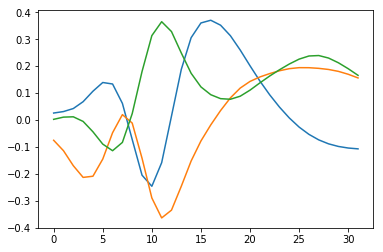

In [20]:
for comp in three_new_basis:
    plt.plot(comp)
plt.show()

In [21]:
three_classified = PCA_classify(three_neurons_test, three_new_basis, three_mean)

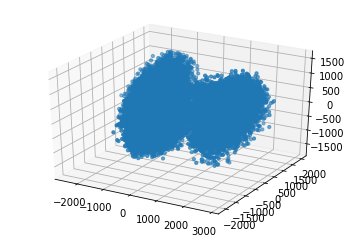

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(three_classified.T[0], three_classified.T[1], three_classified.T[2], zdir='z', s=10, c=None, depthshade=True)
plt.show()
#it's not too clear to cluster through the 3D plot

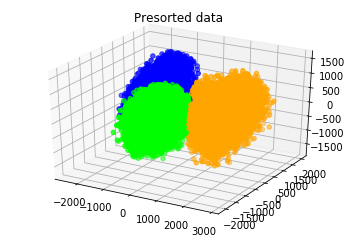

In [23]:
#color the points on the presorted neutrons and see from diff angels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
presorted_three_classified = [PCA_classify(spikes, three_new_basis, three_mean) for spikes in presorted]
colors = ['#0000ff','#00ff00','#FFA500']
for dat, color in zip(presorted_three_classified, colors):
    ax.scatter(dat.T[0], dat.T[1], dat.T[2], zdir ='z', c=color)
plt.title('Presorted data')
plt.show()

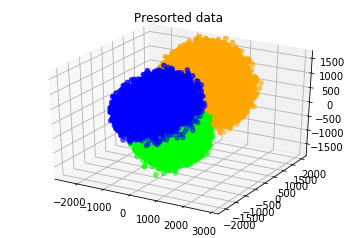

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['#0000ff','#00ff00','#FFA500']
for dat, color in zip(presorted_three_classified, colors):
    ax.scatter(dat.T[0], dat.T[1], dat.T[2], zdir ='x', c=color)
plt.title('Presorted data')
plt.show()


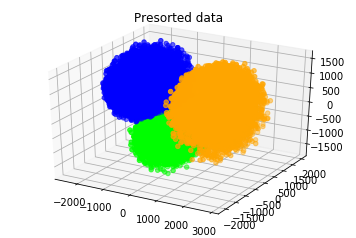

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['#0000ff','#00ff00','#FFA500']
for dat, color in zip(presorted_three_classified, colors):
    ax.scatter(dat.T[0], dat.T[1], dat.T[2], zdir ='y', c=color)
plt.title('Presorted data')
plt.show()

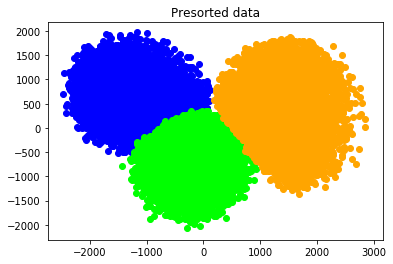

In [26]:
#i think two d is ok 
#let's see
three_new_basis_2, three_mean_2 = PCA_train(three_neurons_training,2)

#let's color the points base on different neurons.
plt.figure()
presorted_three_classified_2 = [PCA_classify(spikes, three_new_basis_2, three_mean_2) for spikes in presorted]
colors = ['#0000ff','#00ff00','#FFA500']
for dat, color in zip(presorted_three_classified_2, colors):
    plt.scatter(dat.T[0], dat.T[1],  c=color)
plt.title('Presorted data')
plt.show()

i think 2 principle components are enough to cluster 3 neutrons. most of the spikes can be separated by curves.
Let's see how the cluster performance with 3 principle components and 2 principle components.

In [27]:
#now build up the classification based on SVM
#pick up 50% data from presorted and label them (train set), others without label
train_neutron_1 = [presorted[0][i] for i in range(len(presorted[0])//2)]
train_neutron_2 = [presorted[1][i] for i in range(len(presorted[1])//2)]
train_neutron_3 = [presorted[2][i] for i in range(len(presorted[2])//2)]
test_neutron_1 = [presorted[0][i] for i in range(len(presorted[0])//2,len(presorted[0]))]
test_neutron_2 = [presorted[1][i] for i in range(len(presorted[1])//2,len(presorted[1]))]
test_neutron_3 = [presorted[2][i] for i in range(len(presorted[2])//2,len(presorted[2]))]

y_neutron_1 = [1]*(len(presorted[0])//2)
y_neutron_2 = [2]*(len(presorted[1])//2)
y_neutron_3 = [3]*(len(presorted[2])//2)

In [28]:
#data set for 3 neutrons
train_x_3 = train_neutron_1 + train_neutron_2 + train_neutron_3
train_y_3 = y_neutron_1 + y_neutron_2 + y_neutron_3
test_x_3 = test_neutron_1 + test_neutron_2 + test_neutron_3

In [29]:
#data set for 2 neutrons
train_x_2 = train_neutron_1 + train_neutron_2 
train_y_2 = y_neutron_1 + y_neutron_2 
test_x_2 = test_neutron_1 + test_neutron_2 

In [30]:
#pca the train set and test set on the three principle components projection
three_classifier_train = PCA_classify(train_x_3, three_new_basis, three_mean)
three_classifier_test = PCA_classify(test_x_3, three_new_basis, three_mean)

In [31]:
#apply svm 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(three_classifier_train,train_y_3)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [32]:
#class the test set and then count the number of diff classification
result = poly_kernel_svm_clf.predict(three_classifier_test)

In [33]:
group1_num = 0 
group2_num = 0
group3_num = 0
group1 = []
group2 = []
group3 = []
for i in range(len(result)):
    if result[i] == 1:
        group1_num = group1_num + 1
        group1.append(three_classifier_test[i])
    else:
        if result[i] == 2:
            group2_num = group2_num + 1
            group2.append(three_classifier_test[i])
        else:
            group3_num = group3_num +1
            group3.append(three_classifier_test[i])

In [34]:
group = list(range(3))
group[0] = np.asarray(group1)
group[1] = np.asarray(group2)
group[2] = np.asarray(group3)

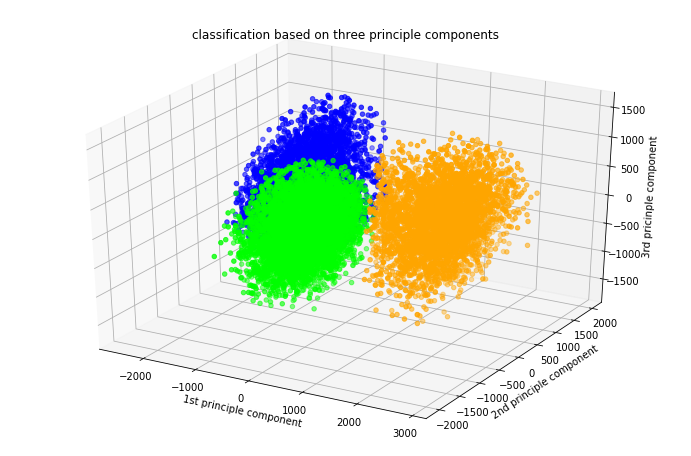

In [35]:
#plot
fig = plt.figure(num='svm_class',figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['#0000ff','#00ff00','#FFA500']
for dat, color in zip(group, colors):
    ax.scatter(dat.T[0], dat.T[1], dat.T[2], zdir ='z', c=color)
ax.set_zlabel('3rd pricinple component')  
ax.set_ylabel('2nd principle component')
ax.set_xlabel('1st principle component')
plt.title('classification based on three principle components')
plt.show()

In [36]:
#see how many neutrons in diff groups
'in group1, there are ' + str(len(group[0])) + ' spikes.' + ' in group2, there are ' + str(len(group[1])) + ' spikes.' + ' in goup3, there are ' + str(len(group[2])) + ' spikes'

'in group1, there are 3501 spikes. in group2, there are 5794 spikes. in goup3, there are 3900 spikes'

In [37]:
'while with true label, in group1, 2, and 3, there should be ' + str(len(test_neutron_1)) + ' , ' + str(len(test_neutron_2)) + ' , ' + str(len(test_neutron_3))

'while with true label, in group1, 2, and 3, there should be 3516 , 5779 , 3900'

I think most spikes are classified into the right group, there may be some misclassified on the edge.
Now, let's try the svm on 2 principle components

In [38]:
#pca the train set and test set on the two principle components projection
two_classifier_train = PCA_classify(train_x_3, two_new_basis, two_mean)
two_classifier_test = PCA_classify(test_x_3, two_new_basis, two_mean)
poly_kernel_svm_clf.fit(two_classifier_train,train_y_3)
result = poly_kernel_svm_clf.predict(two_classifier_test)

In [39]:
group1_num = 0 
group2_num = 0
group3_num = 0
group1 = []
group2 = []
group3 = []
for i in range(len(result)):
    if result[i] == 1:
        group1_num = group1_num + 1
        group1.append(two_classifier_test[i])
    else:
        if result[i] == 2:
            group2_num = group2_num + 1
            group2.append(two_classifier_test[i])
        else:
            group3_num = group3_num +1
            group3.append(two_classifier_test[i])

group = list(range(3))
group[0] = np.asarray(group1)
group[1] = np.asarray(group2)
group[2] = np.asarray(group3)

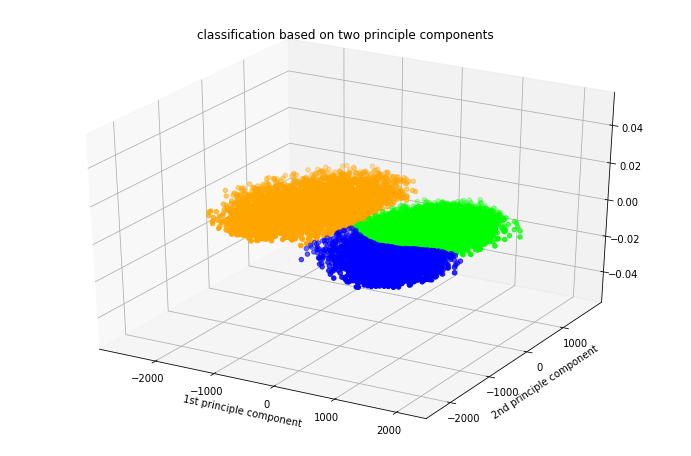

In [40]:
#plot
fig = plt.figure(num='svm_class',figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['#0000ff','#00ff00','#FFA500']
for dat, color in zip(group, colors):
    ax.scatter(dat.T[0], dat.T[1], zdir ='z', c=color)  
ax.set_ylabel('2nd principle component')
ax.set_xlabel('1st principle component')
plt.title('classification based on two principle components')
plt.show()

In [41]:
#see how many neutrons in diff groups
'in group1, there are ' + str(len(group[0])) + ' spikes.' + ' in group2, there are ' + str(len(group[1])) + ' spikes.' + ' in goup3, there are ' + str(len(group[2])) + ' spikes'

'in group1, there are 2875 spikes. in group2, there are 6414 spikes. in goup3, there are 3906 spikes'

In [42]:
'while with true label, in group1, 2, and 3, there should be ' + str(len(test_neutron_1)) + ' , ' + str(len(test_neutron_2)) + ' , ' + str(len(test_neutron_3))

'while with true label, in group1, 2, and 3, there should be 3516 , 5779 , 3900'

<font color=blue>it seems like there are lots violation on the edge of group1 and group2. Two principle components aren't enough for classification of three neutrons

In [43]:
#let me see how svm performance on two neutrons
two_classifier_train = PCA_classify(train_x_2, two_new_basis, two_mean)
two_classifier_test = PCA_classify(test_x_2, two_new_basis, two_mean)

poly_kernel_svm_clf.fit(two_classifier_train,train_y_2)

result = poly_kernel_svm_clf.predict(two_classifier_test)

In [44]:
group1_num = 0 
group2_num = 0
group1 = []
group2 = []
for i in range(len(result)):
    if result[i] == 1:
        group1_num = group1_num + 1
        group1.append(two_classifier_test[i])
    else:
        if result[i] == 2:
            group2_num = group2_num + 1
            group2.append(two_classifier_test[i])

In [45]:
group = list(range(2))
group[0] = np.asarray(group1)
group[1] = np.asarray(group2)

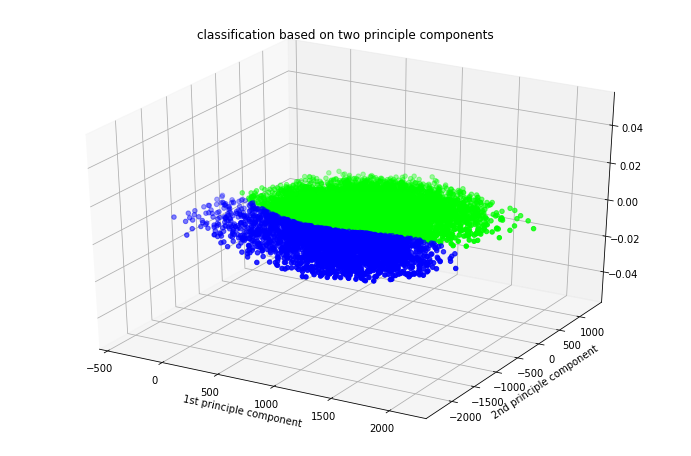

In [46]:
#plot
fig = plt.figure(num='svm_class',figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['#0000ff','#00ff00']
for dat, color in zip(group, colors):
    ax.scatter(dat.T[0], dat.T[1], zdir ='z', c=color) 
ax.set_ylabel('2nd principle component')
ax.set_xlabel('1st principle component')
plt.title('classification based on two principle components')
plt.show()

In [47]:
#see how many neutrons in diff groups
'in group1, there are ' + str(len(group[0])) + ' spikes.' + ' in group2, there are ' + str(len(group[1])) + ' spikes.' 

'in group1, there are 2886 spikes. in group2, there are 6409 spikes.'

In [48]:
'while with true label, in group1 and 2, there should be ' + str(len(test_neutron_1)) + ' , ' + str(len(test_neutron_2)) 

'while with true label, in group1 and 2, there should be 3516 , 5779'

the result is not good enough >_<

# part 2.2

Instead of classifying by separation along the principal component axes, we can instead use k-means to perform the classification for us by minimizing distance to a centroid (a mean neuron signature).Based on the documentationfor scipy   kmeans, adjust our approach for the 2-neuron and 3-neuron data sets.Apply yourclassification to the two_classified and to the three_classified data sets and count the number of times each neuron fired.

In [49]:
from sklearn.cluster import KMeans
#first let's fit two neutrons train set
kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(train_x_2)

In [50]:
kmeans_2_test = kmeans_2.predict(test_x_2)

In [53]:
#next let's fit two neutrons train set
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(train_x_3)
kmeans_3_test = kmeans_3.predict(test_x_3)

In [54]:
#see how many spikes are classified into diff group
#for three neutrons
group1_num = 0 
group2_num = 0
group3_num = 0
for i in range(len(kmeans_3_test)):
    if kmeans_3_test[i] == 2:
        group1_num = group1_num + 1
    else:
        if kmeans_3_test[i] == 0:
            group2_num = group2_num + 1
        else:
            group3_num = group3_num +1

In [55]:
'classifation: ' + str(group1_num) + ' ' + str(group2_num) + ' ' + str(group3_num)

'classifation: 3345 5966 3884'

In [56]:
'true: ' +  str(len(test_neutron_1)) + ' ' + str(len(test_neutron_2)) + ' ' + str(len(test_neutron_3))

'true: 3516 5779 3900'

In [57]:
#how about two neutrons
group1_num = 0 
group2_num = 0
for i in range(len(kmeans_2_test)):
    if kmeans_2_test[i] == 1:
        group1_num = group1_num + 1
    else:
        if kmeans_2_test[i] == 0:
            group2_num = group2_num + 1

In [58]:
'classifation: ' + str(group1_num) + ' ' + str(group2_num) 

'classifation: 3347 5948'

In [59]:
'true: ' +  str(len(test_neutron_1)) + ' ' + str(len(test_neutron_2)) 

'true: 3516 5779'

In [60]:
#let's try on presorted data to see how well k-means is
kmean_2_presorted = [kmeans_2.predict(spikes) for spikes in presorted[1:]]
kmean_3_presorted = [kmeans_3.predict(spikes) for spikes in presorted]

As we can see, compare to the result of SVM with pre PCA, k-means method is worse, the violations of its edge is more than SVM. SVM based on PCA is a better choice for this data.

In [61]:
#let's see the accuracy of the k-means soft
#def the way to calculate the accuracy
def accuracy(data, real_label):
    count = 0
    for i in range(len(data)):
        if data[i] == real_label:
            count = count + 1
    return count/len(data)